In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X,y = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [13]:
class LinearRegression1():

    def __init__(self,lr=0.001,n_iters=1000):  #lr = learning rate , n_iters = number of iterations
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None  
        self.bias = None
        
    
    def fit(self,X,y):
        n_samples , n_features = X.shape  #Samples are numbers or rows and features are columns
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            #guess = m * x + b
            y_predicted = np.dot(X,self.weights) + self.bias
            
            dw = (1/n_samples) * np.dot(X.T,(y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw     
            self.bias -= self.lr * db

    def predict(self,X): #For new test samples
        y_predicted = np.dot(X,self.weights) + self.bias
        return y_predicted

In [14]:
regressor = LinearRegression1(lr=0.01)

In [15]:
regressor.fit(X_train,y_train)

In [16]:
predicted = regressor.predict(X_test)

In [17]:
def MSE(y_true,y_predicted):
    return np.mean((y_true - y_predicted)**2)

mse_value = MSE(y_test,predicted)
print(mse_value)

242.6143166042288


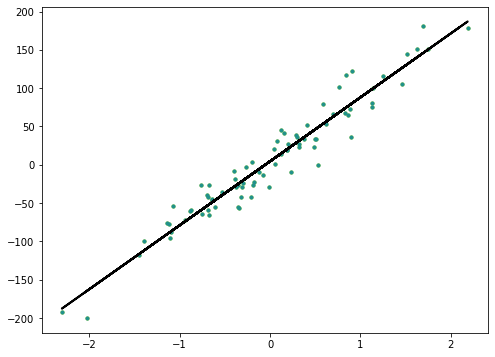

In [18]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize = (8,6))
m1 = plt.scatter(X_train,y_train,color = cmap(0.9),s=10)
m2 = plt.scatter(X_train,y_train,color = cmap(0.5),s=10)
plt.plot(X,y_pred_line,color ="black",linewidth=2,label="Prediction")
plt.show()

In [19]:
r2_score(y_test,predicted)

0.9581392174258689

# Scikit-Learn Implementation

In [27]:
LR = LinearRegression()

In [28]:
LR.fit(X_train,y_train)

LinearRegression()

In [29]:
y_predicted = LR.predict(X_test)

In [30]:
print(mean_squared_error(y_test,y_predicted))

243.01536144061183


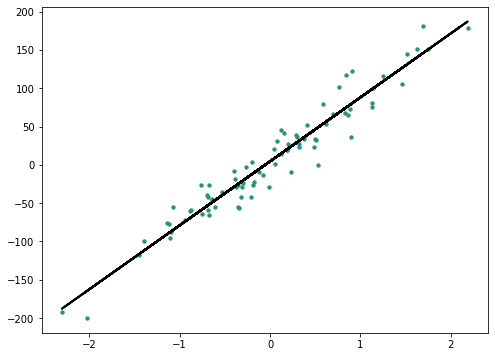

In [31]:
y_pred_line = LR.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize = (8,6))
m1 = plt.scatter(X_train,y_train,color = cmap(0.9),s=10)
m2 = plt.scatter(X_train,y_train,color = cmap(0.5),s=10)
plt.plot(X,y_pred_line,color ="black",linewidth=2,label="Prediction")
plt.show()

In [32]:
r2_score(y_test,y_predicted)

0.9580700209706339